In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('pre-processed_data.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,8,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
# Normalize countinous feature (except output (area) )

for column in df.columns:
    if df[column].dtype == 'float64' and column != 'area':
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column] - mean) / std

In [4]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,51,1.497164,-0.073197,0.00
1,7,4,10,3,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,33,-1.740070,-0.073197,0.00
2,7,4,10,7,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,33,-1.516813,-0.073197,0.00
3,8,6,3,6,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,97,-0.009824,0.602572,0.00
4,8,6,3,8,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,99,-1.237741,-0.073197,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,8,-1.638496,-0.845829,0.474309,-1.561947,1.534597,32,-0.735411,-0.073197,6.44
513,2,4,8,8,-1.638496,-0.845829,0.474309,-1.561947,0.518517,71,0.994835,-0.073197,54.29
514,7,4,8,8,-1.638496,-0.845829,0.474309,-1.561947,0.397965,70,1.497164,-0.073197,11.16
515,1,4,8,7,0.680298,0.548471,0.269122,0.499693,1.155720,42,-0.009824,-0.073197,0.00


# Model

In [5]:
class LinearRegression:
    def rmse(self, Y: np.ndarray , Y_pred: np.ndarray ) -> float:
        #calculate root-mean-square error
        delta = Y - Y_pred

        return (delta**2).mean()**0.5
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # optimize weights 
        inv_cov = np.linalg.inv(X.T @ X)
        self.thelta = inv_cov @ (X.T @ y)

    def predict(self, X: np.ndarray) -> np.ndarray:
        # predict the area (output)
        y = self.thelta.T @ X.T

        return y

In [6]:
X_Y = df.to_numpy()

In [7]:
X_Y

array([[ 7.00000000e+00,  5.00000000e+00,  3.00000000e+00, ...,
         1.49716438e+00, -7.31974162e-02,  0.00000000e+00],
       [ 7.00000000e+00,  4.00000000e+00,  1.00000000e+01, ...,
        -1.74007034e+00, -7.31974162e-02,  0.00000000e+00],
       [ 7.00000000e+00,  4.00000000e+00,  1.00000000e+01, ...,
        -1.51681277e+00, -7.31974162e-02,  0.00000000e+00],
       ...,
       [ 7.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
         1.49716438e+00, -7.31974162e-02,  1.11600000e+01],
       [ 1.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
        -9.82419660e-03, -7.31974162e-02,  0.00000000e+00],
       [ 6.00000000e+00,  3.00000000e+00,  1.10000000e+01, ...,
         2.69247762e-01, -7.31974162e-02,  0.00000000e+00]])

In [8]:
row = df.shape[0]
X_Y_train, X_Y_test = np.split(X_Y, indices_or_sections=[int(0.8*row)])

In [9]:
X_Y_train

array([[ 7.        ,  5.        ,  3.        , ...,  1.49716438,
        -0.07319742,  0.        ],
       [ 7.        ,  4.        , 10.        , ..., -1.74007034,
        -0.07319742,  0.        ],
       [ 7.        ,  4.        , 10.        , ..., -1.51681277,
        -0.07319742,  0.        ],
       ...,
       [ 6.        ,  3.        ,  2.        , ..., -0.73541129,
        -0.07319742,  0.        ],
       [ 7.        ,  4.        ,  2.        , ...,  3.00415295,
        -0.07319742,  4.62      ],
       [ 9.        ,  4.        ,  7.        , ...,  0.26924776,
        -0.07319742,  1.63      ]])

In [10]:
X_Y_test

array([[ 7.00000000e+00,  5.00000000e+00,  8.00000000e+00, ...,
        -2.33081763e-01, -7.31974162e-02,  0.00000000e+00],
       [ 5.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
        -9.82419660e-03, -7.31974162e-02,  0.00000000e+00],
       [ 8.00000000e+00,  6.00000000e+00,  8.00000000e+00, ...,
         4.92505328e-01, -7.31974162e-02,  7.46280000e+02],
       ...,
       [ 7.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
         1.49716438e+00, -7.31974162e-02,  1.11600000e+01],
       [ 1.00000000e+00,  4.00000000e+00,  8.00000000e+00, ...,
        -9.82419660e-03, -7.31974162e-02,  0.00000000e+00],
       [ 6.00000000e+00,  3.00000000e+00,  1.10000000e+01, ...,
         2.69247762e-01, -7.31974162e-02,  0.00000000e+00]])

In [11]:
lr = LinearRegression()

In [12]:
X_train = X_Y_train[:,:12]
Y_train = X_Y_train[:,12:]

X_test = X_Y_test[:, :12]
Y_test = X_Y_test[:, 12:]

In [13]:
lr.fit(X_train, Y_train)

In [14]:
Y_predicted = lr.predict(X_test)

In [15]:
Y_predicted

array([[ 33.69374331,  27.22540219,  27.22851799,  17.95781577,
          5.29045576,  26.13122516,  25.93176698,  24.80686609,
         19.0696319 ,  41.4371032 ,  10.21601619,  34.859941  ,
         21.85195875,  25.90945302,  18.94199297,  19.430732  ,
         25.20418306,  33.18550059,  20.78460725,  23.65104594,
         18.96017257,  27.26131675,  12.69968915,  23.16696613,
         20.25757092,  22.15653964,   9.04489429,  27.9984751 ,
         24.72416169,  -2.55843392,  -7.60214619,  24.26947945,
          5.67393888,  19.93540951,  -1.07435372,  17.28498705,
         23.60085437,  10.61326717,  -2.47739939,  16.3105936 ,
         24.14011551,  21.20325808,   0.5955757 ,  19.16978362,
         14.28071538,  23.94769842,  25.1663665 ,  18.18995564,
         23.94769842,  21.6083746 , -10.78295762,  -8.83678729,
         -0.86550332,  -2.70779927,  -0.50866803,   6.97531005,
         10.38778686,  10.63371797,  11.20607994,   4.63469284,
         15.29853809,  14.20720122,   4.

In [16]:
lr.rmse(Y_test, Y_predicted)

80.91163282403298

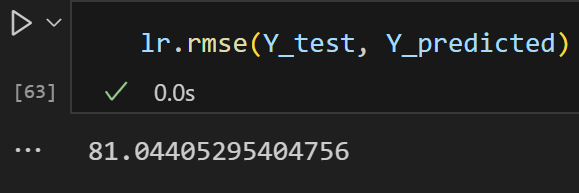

# Comparison

The rmse without normalizing countinous features show a worse result than the normalizing one

In [17]:
import matplotlib.pyplot as plt


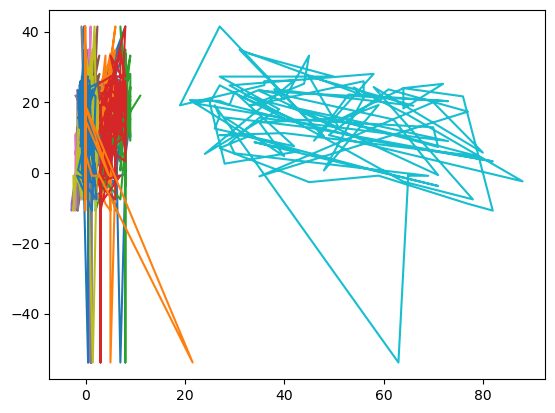

In [18]:
plt.plot(X_test, Y_predicted.T)